In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.1 MB/s eta 0:00:00


In [2]:
# this cell may take up to 30 seconds to run to convert the Hugginface Dataset class to Pandas DataFrame for better EDA

from datasets import load_dataset
import pandas as pd

HF_SPOTIFY_DATASET_PATH = "maharshipandya/spotify-tracks-dataset"
# https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset

ds = load_dataset(HF_SPOTIFY_DATASET_PATH) #only has 'train' split as key
df = pd.DataFrame(ds["train"])
df.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.68k [00:00<?, ?B/s]

dataset.csv:   0%|          | 0.00/20.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/114000 [00:00<?, ? examples/s]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
# show all columns with only 2 values
df[[col for col in df.columns if len(df[col].unique()) == 2]]

,explicit,mode
0,False,0
1,False,1
2,False,1
3,False,1
4,False,1
...,...,...
113995,False,1
113996,False,0
113997,False,0
113998,False,1


In [4]:
df.dropna(inplace=True)

In [5]:
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap='RdYlGn').set_properties(**{'font-size': '10pt'}).set_table_styles([dict(selector='th', props=[('text-align', 'right')])])

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Unnamed: 0,1.000000,0.032146,-0.032738,-0.054735,0.003445,-0.055993,-0.005521,-0.027307,0.005110,-0.084952,0.076837,-0.070285,0.033641,0.053109,-0.025825,-0.021115
popularity,0.032146,1.000000,-0.007129,0.044078,0.035444,0.001053,-0.003847,0.050420,-0.013948,-0.044930,-0.025458,-0.095147,-0.005397,-0.040522,0.013212,0.031076
duration_ms,-0.032738,-0.007129,1.000000,-0.065270,-0.073435,0.058520,0.008123,-0.003475,-0.035581,-0.062605,-0.103770,0.124364,0.010308,-0.154464,0.024356,0.018229
explicit,-0.054735,0.044078,-0.065270,1.000000,0.122506,0.096954,0.004485,0.108587,-0.037216,0.307951,-0.094400,-0.103405,0.032547,-0.003378,-0.002815,0.038387
danceability,0.003445,0.035444,-0.073435,0.122506,1.000000,0.134325,0.036470,0.259076,-0.069224,0.108625,-0.171531,-0.185608,-0.131620,0.477347,-0.050448,0.207219
energy,-0.055993,0.001053,0.058520,0.096954,0.134325,1.000000,0.048007,0.761690,-0.078365,0.142508,-0.733908,-0.181880,0.184795,0.258937,0.247852,0.187127
key,-0.005521,-0.003847,0.008123,0.004485,0.036470,0.048007,1.000000,0.038591,-0.135911,0.020419,-0.040942,-0.006821,-0.001597,0.034099,0.010914,0.015064
loudness,-0.027307,0.050420,-0.003475,0.108587,0.259076,0.761690,0.038591,1.000000,-0.041768,0.060826,-0.589804,-0.433478,0.076897,0.279851,0.212447,0.191992
mode,0.005110,-0.013948,-0.035581,-0.037216,-0.069224,-0.078365,-0.135911,-0.041768,1.000000,-0.046535,0.095568,-0.049961,0.014004,0.021964,0.000572,-0.024090
speechiness,-0.084952,-0.044930,-0.062605,0.307951,0.108625,0.142508,0.020419,0.060826,-0.046535,1.000000,-0.002184,-0.089617,0.205218,0.036637,0.017274,-0.000011


<Axes: >

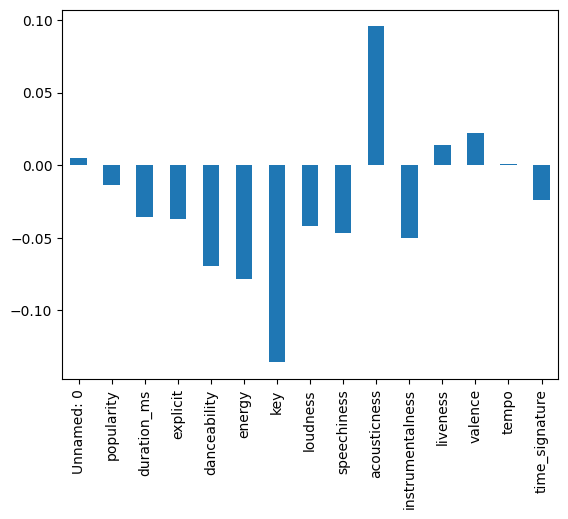

In [6]:
df.corr(numeric_only=True)['mode'].drop('mode').plot(kind='bar')

<Axes: >

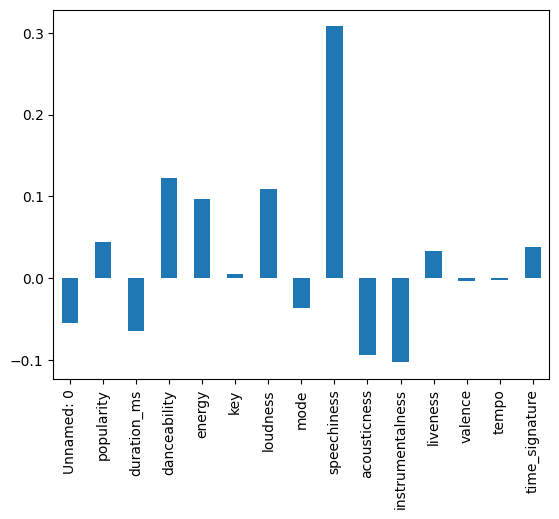

In [7]:
df.corr(numeric_only=True)['explicit'].drop('explicit').plot(kind='bar')


## 1. For the data set you have chosen choose any binary categorical response variable to model for logistic regression. (This does not have to be directly related to the final goal of your project.)
- we chose the binary categorical response variable explicitness, which can be True or False

## 2. Choose a single variable or variables to use as predictors
- we chose speechiness, danceability, and instrumentalness to use as predictors

In [8]:
y = df['explicit']
X = df[['speechiness', 'danceability', 'instrumentalness']] # highest absolute correlation with explicit (> |0.1|)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]

## 4a. Calculate and plot the ROC curve and AUC on your validation data set. (question 3 below)

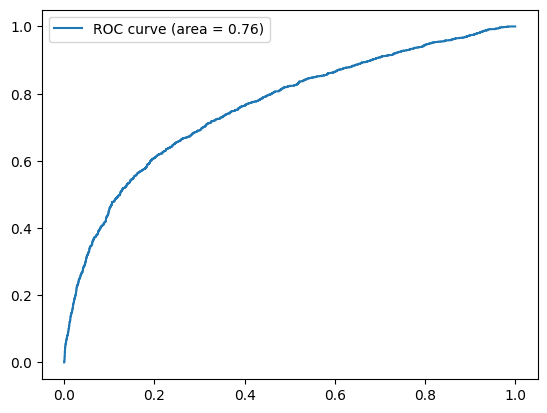

AUC score: 0.7614046319441418


In [10]:
# plot ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc(fpr, tpr):.2f})')
plt.legend()
plt.show()
print(f"AUC score: {auc(fpr, tpr)}")

In [11]:
# find the best threshold that minimizes fpr and maximizes tpr
import numpy as np
best_thresh = thresholds[np.argmax(tpr - fpr)]
print(f"Best threshold: {best_thresh}")
preds = (probs > best_thresh).astype(int)


Best threshold: 0.09536726733599304


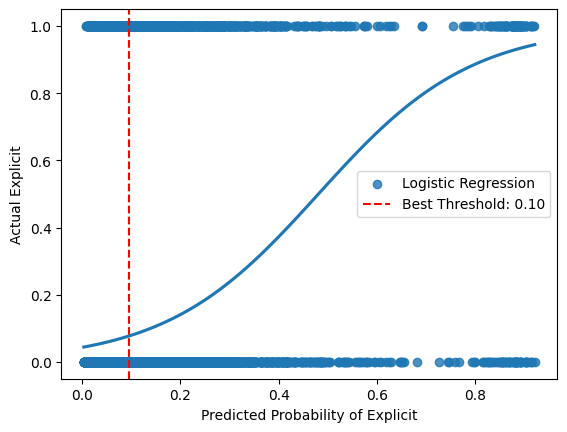

In [12]:
# plot the log reg model
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x=probs, y=y_test, logistic=True, ci=None, label='Logistic Regression')
plt.axvline(best_thresh, color='red', linestyle='--', label=f'Best Threshold: {best_thresh:.2f}')
plt.xlabel('Predicted Probability of Explicit')
plt.ylabel('Actual Explicit')
plt.legend()
plt.show()


## 3. Model your logistic regression and calculate the confusion matrix, prediction accuracy, predication error, true positive rate, and true negative rate on your training data set.


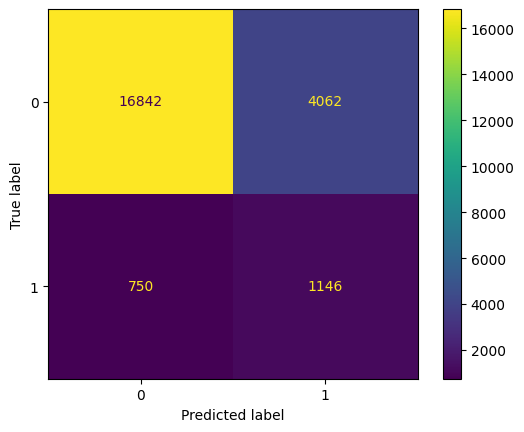

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(conf_matrix).plot()

In [14]:
# show metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, preds))

print(f"Prediction accuracy: {accuracy_score(y_test, preds)}")
print(f"Prediction error: {1 - accuracy_score(y_test, preds)}")
print(f"True positive rate: {conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])}")
print(f"True negative rate: {conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])}")

              precision    recall  f1-score   support

       False       0.96      0.81      0.88     20904
        True       0.22      0.60      0.32      1896

    accuracy                           0.79     22800
   macro avg       0.59      0.71      0.60     22800
weighted avg       0.90      0.79      0.83     22800

Prediction accuracy: 0.7889473684210526
Prediction error: 0.21105263157894738
True positive rate: 0.6044303797468354
True negative rate: 0.8056831228473019


In [20]:
# custom acc scoring func to use best thresh instead of 0.5``
def calc_acc_best_thresh(model, X, y):
    probs = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, probs)
    best_thresh = thresholds[np.argmax(tpr - fpr)]
    preds = (probs > best_thresh).astype(int)

    return accuracy_score(y, preds)


## 4b. Use 5-fold cross-validation on the validation set to calculate the AUC and accuracy of each fold.

In [28]:
# print auc and accuracy for each fold using 5-fold cross validation
from sklearn.model_selection import cross_val_score
auc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
accuracy_scores = cross_val_score(model, X, y, cv=5, scoring=calc_acc_best_thresh)

for i in range(5):
    print(f'Fold {i+1}')
    print(f'AUC score: {auc_scores[i]}')
    print(f'Accuracy score: {accuracy_scores[i]}')
    print()


Fold 1
AUC score: 0.805788592761281
Accuracy score: 0.7791666666666667

Fold 2
AUC score: 0.7783097296242913
Accuracy score: 0.7414473684210526

Fold 3
AUC score: 0.6485269138535326
Accuracy score: 0.7792105263157895

Fold 4
AUC score: 0.744357806062842
Accuracy score: 0.7933771929824561

Fold 5
AUC score: 0.8028599183249604
Accuracy score: 0.7855607702092197



## 5. How did you choose a threshold for positive predictions?

The use case for our Binary Classification model is to predict whether a song is explicit. In this case, it is much more useful for us to predict whether a song is explicit than to predict whether it is not explicit (consider electing a new song - as in we don't know for sure if it will be explicit or not - we want to predict whether it is explicit so we can filter it out). In this case, we want to maximize the true positive rate and minimize the false positive rate. This means choosing the threshold that maximizes TPR-FPR. So, we choose the threshold that maximizes the TPR-FPR, which is printed somewhere above.

Additionally, we had to make a custom accuracy scoring function to use the best threshold instead of the default 0.5 threshold. \
 best_thresh = thresholds[np.argmax(tpr - fpr)] \
The snippet gave us the best threshold at 0.10. This is because the reponse variable we are using is binary, so a threshold of 0.5 is too high to accurately predict. By lowering it, we optimized our TPR-FPR.
